# 第7章 Matplotlib

**本章内容提要**：

- Matplotlib命名约定
- Matplotlib三种绘图场景
- Matplotlib两种应用接口
- 基本图形绘制

简单的图形可以给数据分析师带来比其他任何设备更多的信息。在上一章中，本书介绍了Python数据分析最核心的底层库NumPy、基于ndarray对象的数组操作方法与基本统计。本章将开始指引读者从更直观的角度——“图形”——了解数据的分布与规律，先学习Matplotlib的基本理念和接口，然后学习如何绘制常见的图形以及更多的自定义。

## 7.1 Matplotlib入门

### 7.1.1 Matplotlib库简介	

数据可视化是数据分析最核心的工作之一，它既能帮助我们探索数据，如寻找异常值，也能够帮助我们汇总分析结果，即所谓的“一图胜千言”。Python有着众多的库可以进行静态或动态的数据可视化，其中最流行的是Matplotlib（<https://matplotlib.org/>）。因此，本书主要利用Matplotlib向读者介绍如何合理地选择和创建图形。

Matplotlib库的历史并不是很久远，它是John Hunter在2002年启动的一个项目，目的是为Python构建商业科学计算软件MATLAB的绘图接口，在2003年发布了0.1版本（实验版本）。Matplotlib的最重要特点是它可以很好地与许多的操作系统和图形后端工作，这意味着我们可以不管使用什么操作系统或是想要什么输出格式的图形（PDF、JPG、PNG、GIF等）都可以依靠它。这种跨平台，一切皆可用的特性成为了Matplotlib最大的长处，并为Matplotlib带来了大量的基础用户和活跃的开发者。

目前，Matplotlib已经和IPython合作，简化了在IPython Shell和Jupyter Notebook中进行交互式绘图的方式。除此之外，Python社区出现了许多以Matplotlib为底层的可视化计算库，其中最有名的是Seaborn（<https://seaborn.pydata.org/>），在本书后续的章节我们会学习它。

### 7.1.2 命名约定

在深入了解如何使用Matplotlib创建图形之前，本书先向读者介绍一些Python科学计算社区通用的命名约定。

在导入NumPy包时，我们使用Python社区约定的np替代numpy。这里，我们也使用Matplotlib的一些标准简写用于导入。

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Python用户基本上绘图只会用到pyplot子模块中的功能特性，因此plt是使用Matplotlib绘图最常用的简写。

### 7.1.3 如何展示图形

Matplotlib最佳的使用方法依赖于用户如何使用它，通常有3种应用绘图的场景：脚本、IPython Shell和Jupyter Notebook。

#### 使用脚本绘制

读者如果想要在脚本中使用Matplotlib，通常使用plt.show()函数。该函数会寻找当前活跃的所有图形队形，打开一个或多个交互式的窗口展示图形。

假设下面是代码文件plot.py的内容：

```python
# -*- coding: utf-8 -*- 

# 导入模块/包
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.linspace(0, 10, 200)

# 绘制图形
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

# 显示图形
plt.show()
```

接下来在终端中运行该脚本，读者将看到一个显示图形的窗口弹出来。在此处，plt.show()函数在后台进行了多项工作，它与系统的交互式图形后端进行交流，而Matplotlib向我们隐藏了所有的细节。

```
$ python plot.py
```

![图7-1 弹出的图形](images/chapter7/Figure_1.png)

注意，如果是编写脚本文件进行绘图，一个文件尽量只使用一次plt.show()函数，如果使用多次，图形后端行为将变得不可预测。

#### 从IPython Shell绘制

在IPython Shell中使用Matplotlib非常方便，读者如果指定Matplotlib模式，IPython可以工作得非常好。启动IPython后键入魔术命令“%matplotlib”能够激活该模式。 

In [4]:
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


这时候读者如果调用plt.plot()函数就会打开一个图形窗口，然后接下来输入的绘图指令会不断更新这个图。有时候，一些对图形属性的更改不会及时生效，读者可以利用plt.draw()函数强制执行。

#### 在Jupyter Notebook中绘制

在Jupyter Notebook中使用Matplotlib进行交互式绘图也是使用魔术命令“%matplotlib”，它跟在IPython Shell中的工作方式差不多。读者可以使用以下两种选项：

* `%matplotlib notebook` 会在Notebook中嵌入交互式图形
* `%matplotlib inline` 会在Notebook张嵌入静态图形

最常使用的是第二种方式。

In [5]:
%matplotlib inline

运行这条命令后，Notebook任何创建图形的单元格都会嵌入对应的PNG图形。例如，下面创建了一幅跟刚才执行python脚本类似的图形，不过这里略微修改了绘图数据的并设置了线条的类型。

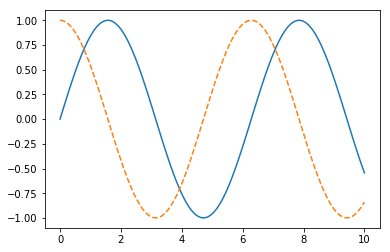

In [6]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()  # 生成一个空白图形并将其赋给fig对象
plt.plot(x, np.sin(x), '-')   # 绘制实线
plt.plot(x, np.cos(x), '--')  # 绘制虚线

请读者试试先运行%matplotlib notebook，再运行上述代码观察执行的结果。

### 7.1.4 保存图形

前面已经介绍过，Matplotlib支持各种系统和图形格式。Matplotlib的好用点还在于，保存所有图形格式的代码都是一样的，只需要调用图形对象的savefig()方法，非常简单易用。

例如，我们用png格式保存刚创建的正弦余弦曲线图，并进行检查。

In [7]:
# 保存图形
fig.savefig("first.png")

# 调用系统命令ls检查
!ls -l first.png

-rw-r--r-- 1 wsx wsx 22604 8月  17 16:49 first.png


pdf是常见的矢量图形格式，现在我们使用一样的命令，仅改动一下保存的文件拓展名。

In [8]:
# 保存pdf矢量图
fig.savefig("first.pdf")

# 调用系统命令ls检查
!ls -l first.pdf

-rw-r--r-- 1 wsx wsx 8519 8月  17 16:50 first.pdf


读者不妨使用pdf阅读器打开该文件看看。

下面代码结果列出Matplotlib支持的所有图形格式：

In [9]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

注意，由于不同读者使用的操作系统以及安装的图形后端都可能不同，因此支持的图形格式可能也会有所变化，因而如果与上述输出不一致也是正常的。

### 7.1.5 两种绘图接口

在前面的几小节中，我们使用类似MATLAB的命令操作方式进行图形的创建工作。除了这种操作方式，Matplotlib还提供了比较原生的Python方式操作图形：这种方式把每一个图形都看作一个对象，读者可以通过对象方法的调用达到图形元素增改的目的。

MATLAB操作方式非常地简便，而面向对象的方式则功能强大。大多数数据分析师或数据科学家在代码中往往同时使用两者，因此代码阅读时容易产生困惑。本小节对两种绘图接口进行简要介绍，帮助读者理清它们的区别。

#### MATLAB样式接口

MATLAB样式接口由plt模块提供，plt包含一系列绘图命令（函数），名称与MATLAB基本一致。下面展示了如何利用plt快速绘制包含两个子图的图形：

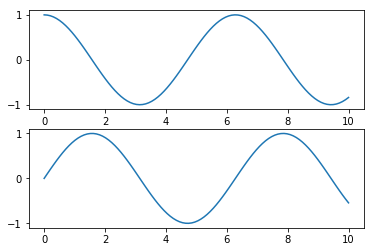

In [10]:
# 创建一个图形
plt.figure()

# 创建两个子图面板
# 创建第1个子图
plt.subplot(2, 1, 1) 
plt.plot(x, np.cos(x))  # 绘制图形

# 创建第2个子图
plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))  # 绘制图形

这里使用了3个命令，每一个都非常简明：

- figure()函数创建一个空白图形
- subplot(rows, columns, subplot_number)函数创建子图，第1个参数设定子图行数，第2个参数设定子图列数，第3个参数设定子图序号
- plot(x, y)函数绘制图形，第1个参数为x轴提供数据，第2个参数为y轴提供数据

对于简单的图形来说，这种接口是极好的，它既快又简单。然而，如果绘制的图形比较复杂，可能就不适应或者出问题了。例如，当我们在操作第2个子图的时候，想要对已经绘制的第1个子图进行增删改，该怎么办？MATLAB样式接口不可能完成这个任务。不过，我们还有更好的办法——面向对象接口。

#### 面向对象接口

面向对象接口可以应对更为复杂的绘图场景，它通过图和坐标轴等图形对象方法的调用来实现各种绘图操作。

现在，我们用面对对象接口实现刚才的图形。

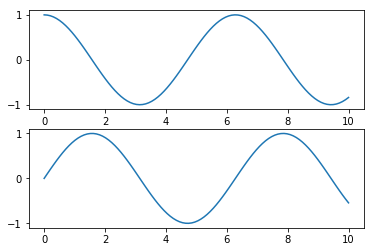

In [11]:
# 首先创建一个图形网格
fig, ax = plt.subplots(2)

# 在坐标轴对象上调用plot()方法
ax[0].plot(x, np.cos(x))
ax[1].plot(x, np.sin(x))

这里subplot()函数返回一个元组，其中第2个元素是一个包含坐标轴对象的数组，在坐标轴对象上调用方法即可绘制、修改图形。

可以看到，两种接口绘制图形的操作都比较简单。对于简单的图形，选择哪一种接口取决于读者的喜好。至于绘制复杂的图形，还是需要掌握面向对象的接口。

## 7.2 基本图形绘制

上一节本书向读者介绍了Matplotlib的绘图场景以及绘图接口，这一节我们接着学习常见图形的绘制，包括线图、散点图、直方图、饼图等。不同类型的图形有很多相同的元素，在线图一小节中本书会详细地进行介绍，以便于读者在其他类型图形绘制的学习中能够快速理解、掌握和应用。

### 7.2.1 线图

线图常常用来表示某个变量随另一个变量变化的趋势，如金融领域中的经济走势图、医院中的心电图。

pyplot模块提供的plot()函数可以轻松地绘制线图，该函数需要读者提供y轴的数据或者同时提供x轴和y轴的数据。如果只提供y轴的数据，那么函数会自动将x轴数据设为同等长度的整数序列，从0开始。

下面代码结果显示无论是使用Python内置的函数range()或者使用numpy模块提供的arange()函数生成序列1到10，绘制的图形完全一致。可见我们使用Matplotlib绘图的重点是准备数据，它会自动帮我们处理好不同的数据类型。

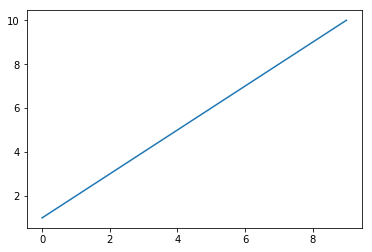

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(range(1, 11))

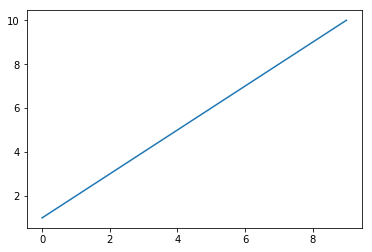

In [11]:
plt.plot(np.arange(1,11))

我们再来看看面向对象接口的使用。

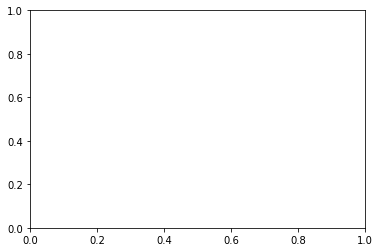

In [12]:
fig = plt.figure()
ax  = plt.axes()

In [13]:
type(fig)

matplotlib.figure.Figure

In [14]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

上面代码先使用figure()函数创建了一个Figure对象，Figure对象可以看做包含一切图形元素的容器，如坐标轴、文字、标签。axes()然后创建了一个Axes（坐标轴）对象，也就是我们上面看到的一个包含刻度和标签的箱子。

通常在使用Matplotlib绘图时，我们都使用fig指向一个Figure对象，ax指向一个坐标轴对象。

现在我们已经有了坐标轴，所需要做的是往上添加数据。在上一节中，我们使用了linspace()函数但没有进行解释，该函数可以创建一个等长的数据序列。例如，linspace(0, 5, 20)就会将0到5分割为20份。

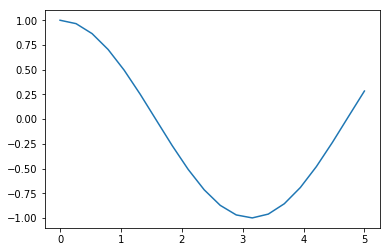

In [15]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 5, 20)
ax.plot(x, np.cos(x))

当我们需要在一个图中绘制多条曲线时，最简单的办法就是多次调用plot()函数。

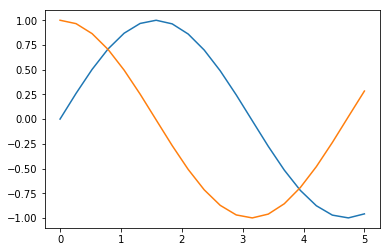

In [16]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

上面matplotlib为曲线自动设置了颜色和类型，在实际应用时我们常需要自定义，它们分别可以使用关键字参数color和linestype进行设定。

color参数接收一个代表任何颜色的字符串，支持多种不同类型的颜色编码，如名字、颜色代码、十六进制、RGB等。

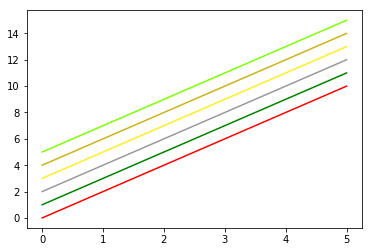

In [17]:
plt.plot(x, 2*x,   color = "red")           # 按名字指定颜色   
plt.plot(x, 2*x+1, color = "g")             # 短颜色编码（rgbcmyk）
plt.plot(x, 2*x+2, color = "0.6")           # 灰度，范围在0-1之间
plt.plot(x, 2*x+3, color = "#FFEE22")       # 十六进制编码
plt.plot(x, 2*x+4, color = (0.8, 0.7, 0.1)) # RGB元组，值从0到1
plt.plot(x, 2*x+5, color = "chartreuse")    # 支持所有的HTML颜色名字

通过设定linestype参数，我们可以展示非常丰富的线条类型，包括虚线、实现、点划线。

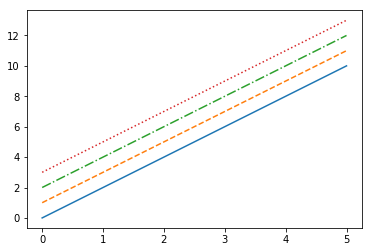

In [18]:
plt.plot(x, 2*x,   linestyle = 'solid')   # 实线
plt.plot(x, 2*x+1, linestyle = 'dashed')  # 虚线
plt.plot(x, 2*x+2, linestyle = 'dashdot') # 点划线
plt.plot(x, 2*x+3, linestyle = 'dotted')  # 小圆点

为了简便，读者也可以使用相应的字符代码。

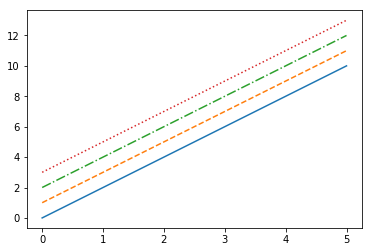

In [19]:
plt.plot(x, 2*x,   linestyle = '-')   # 实线
plt.plot(x, 2*x+1, linestyle = '--')  # 虚线
plt.plot(x, 2*x+2, linestyle = '-.')  # 点划线
plt.plot(x, 2*x+3, linestyle = ':')   # 小圆点

线条类型和颜色往往组合使用，为了简便，我们可以提供一个同时包含线条类型代码和颜色代码的字符串，作为非关键字参数传入plot()函数。

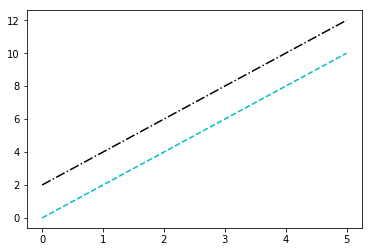

In [20]:
plt.plot(x, 2*x,   '--c')   # 青色的虚线
plt.plot(x, 2*x+2, '-.k')   # 黑色的点划线

了解了如何为线图设定颜色和线条类型后，我们接下来系统地看一下plot()函数常见的参数列表。

```
plot(x, y, linestyle,
     linewidth, color, marker,
     markersize, markeredgecolor,
     label, alpha)
```

下面是具体的说明：

* x - 线图x轴数据
* y - 线图y轴数据
* linestyle - 线条类型
* linewidth - 线条宽度
* color - 颜色
* marker - 可以为线图添加散点，该参数指定点的形状
* markersize - 指定点的大小
* markeredgecolor - 指定点的边框色
* label - 图例标签

虽然plot()函数提供了图例标签信息，但需要配合legend()函数才能显示。

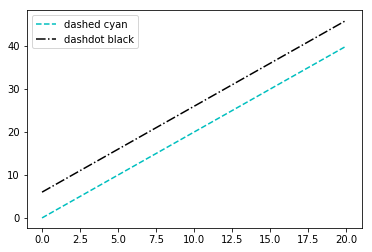

In [21]:
x = np.linspace(0, 20, 100)
plt.plot(x, 2*x,   '--c', label = 'dashed cyan')
plt.plot(x, 2*x+6, '-.k', label = 'dashdot black')

plt.legend()

plot()函数其他几个选项主要用于自定义线条和描述数据点。线图中线条描述了连续的变化，但实际观测的数据值是有限的，因此在一些分析中，同时观测线条和点是非常有必要的。

下面的代码示例将plot()函数涉及的选项都进行自定义设定。

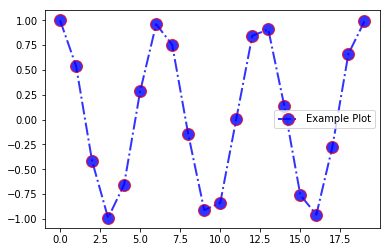

In [22]:
x = range(0, 20)
y = np.cos(x)

plt.plot(x, y, linestyle = '-.',
     linewidth = 2, color = 'blue', marker = 'o',
     markersize = 12, markeredgecolor = 'red',
     label = 'Example Plot', alpha = 0.8)
plt.legend()

了解了如何创建一个美观的带点线图后，读者只要对相应的选项略加更改就可以创建自己喜欢的线图。线条与点的类型、颜色与大小的选择在实际应用时都需要花费时间进行探索。

图形的作用除了显示数据的变化趋势或模式，还常用于比较。下面代码新增了一条红色的曲线，两者的差异一目了然。

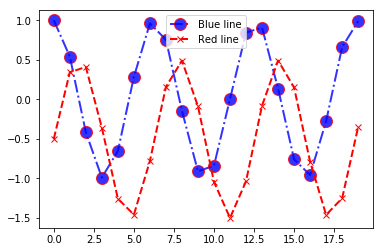

In [23]:
x = range(0, 20)
y = np.cos(x)
y2 = np.sin(x) - 0.5

plt.plot(x, y, linestyle = '-.',
     linewidth = 2, color = 'blue', marker = 'o',
     markersize = 12, markeredgecolor = 'red',
     label = 'Blue line', alpha = 0.8)
plt.plot(x, y2, linestyle = '--',
     linewidth = 2, color = 'red', marker = 'x',
     markersize = 6, markeredgecolor = 'red',
     label = 'Red line')
plt.legend()

图虽然现在已经绘制好了，但缺乏一些必要的说明：坐标轴标签以及图标题。

实现这些需求非常简单，x与y轴标签可以分别通过xlabel()和ylabel()函数添加，而图标题可以使用title()添加。

为方便演示，下面代码绘制一条简单的余弦曲线，并添加轴标签和标题。

Text(0.5,1,'A simple cosine curve')

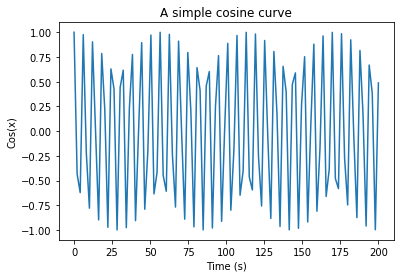

In [24]:
x = np.linspace(0, 200, 100)
plt.plot(x, np.cos(x))
plt.xlabel('Time (s)')
plt.ylabel('Cos(x)')
plt.title('A simple cosine curve')

上面所有绘制的图形都显示了所有的数据区域，有时候我们想要把焦点放到某一个区域，这时需要对轴的范围进行限制，针对x轴和y轴的范围的限制Matplotlib提供了xlim()和ylim()实现。

现在我们将x轴范围限定在50到150，y轴范围限定在-0.5到0.5。

(-0.5, 0.5)

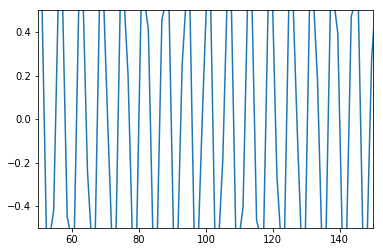

In [25]:
plt.plot(x, np.cos(x))
plt.xlim(50, 150)
plt.ylim(-0.5, 0.5)

如果我们将上面设定的参数值反过来，我们就实现了坐标轴的反转。

(0.5, -0.5)

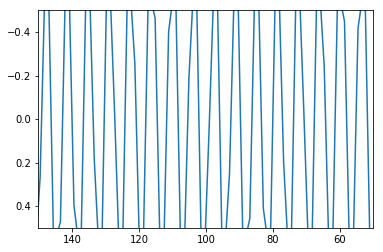

In [26]:
plt.plot(x, np.cos(x))
plt.xlim(150, 50)
plt.ylim(0.5, -0.5)

除了使用xlim()和ylim()函数分别设置x轴和y轴的范围，Matplotlib还提供了函数axis()对它们同时进行设定，该函数需要一个形如[xmin, xmax, ymin, ymax]的列表作为参数。

Text(0.5,1,'A cosine curve with limited x and y')

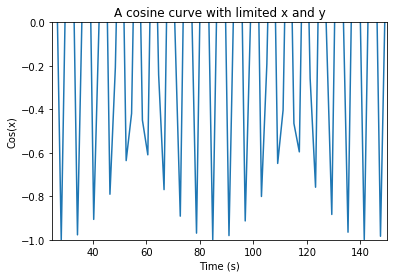

In [27]:
plt.plot(x, np.cos(x))
plt.axis([25, 150, -1, 0])
plt.xlabel('Time (s)')
plt.ylabel('Cos(x)')
plt.title('A cosine curve with limited x and y')

有意思的是，axis()函数除了支持数值列表作为输入，还支持字符选项，Matplotlib会根据输入的字符选项自动地对轴进行调整，这对用户实在太有好不过了。

axis()函数常见支持的选项有：

- axis('off')    - 关闭轴线和标签
- axis('equal')  - 使x轴与y轴保持与屏幕一致的高宽比（横纵比）
- axis('tight')  - 使x与y轴限制在有数据的区域
- axis('square') - 使x与y轴坐标一致

下面通过一些图来认识这些选项的实际效果，其他axis()支持的选项请通过plt.axis?访问函数文档。

(-10.0, 210.0, -1.0999621189366728, 1.0999981961398415)

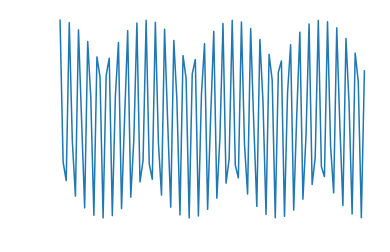

In [28]:
# 去掉轴
plt.plot(x, np.cos(x))
plt.axis('off')

(-10.0, 210.0, -1.0999621189366728, 218.90003788106333)

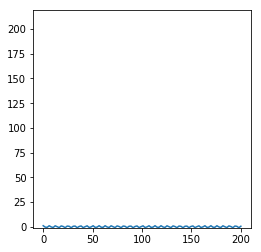

In [29]:
# 使x与y轴坐标完全一致
plt.plot(x, np.cos(x))
plt.axis('square')

(-10.0, 210.0, -1.0999621189366728, 1.0999981961398415)

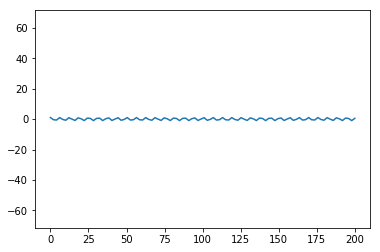

In [30]:
# 与屏幕一致的横纵比
plt.plot(x, np.cos(x))
plt.axis('equal')

(-10.0, 210.0, -1.0999621189366728, 1.0999981961398415)

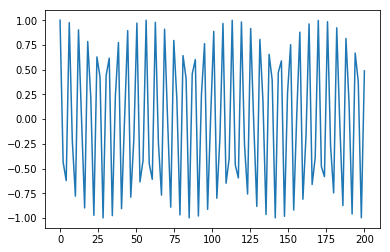

In [31]:
# 默认的选项
plt.plot(x, np.cos(x))
plt.axis('tight')

这一小节本书以线图为对象向读者详细地介绍了如何使用Matplotlib绘制线图这一常见的图形以及如何添加标签、标题、轴范围限定等等自定自定义操作。有了线图作为学习的基础，本书接下来的几个小节将不再对自定义的操作进行赘述，只对基础图形的绘图函数进行必要的介绍。

### 7.2.2 散点图

散点图在观察数据量以及数据的分布时非常有用。Matplotlib提供了两种方式绘制点图：一种是我们上一小节学习的plot()函数，另一种是这一小节将要介绍的scatter()函数。

对于简单的图形，读者选择使用两种方式的哪一种取决于自己的习惯。plot()函数比较简单，而scatter()则提供了更多可以自定义的特性。不过，这也意味着后者在实现上会需要更多的计算资源，因此对于大型的数据集，plot()可能更为实用。

我们先通过两个简单的点图来了解两种方式使用上的不同。plot()函数默认绘制的是线图，为了显示点图，我们需要传入非关键字参数"o"表示点，而scatter()函数不需要这样的设定。

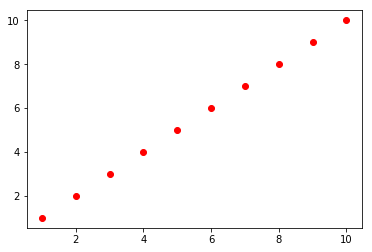

In [32]:
import numpy as np
import matplotlib.pyplot as plt

x = range(1, 11)
plt.plot(x, x, "o", color = "red") # 设定为红色的点

scatter()函数使用关键字参数marker可以设定点的类型，默认是用"o"表示的小圆点。

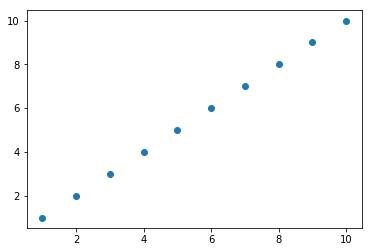

In [33]:
x = range(1, 11)
plt.scatter(x, x)

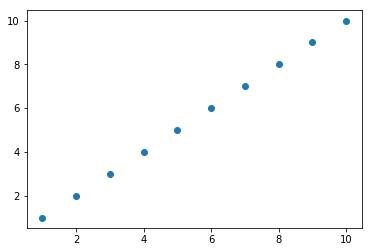

In [34]:
plt.scatter(x, x, marker = 'o')  # 与上面代码输出图形一致

Python支持很多种点类型，如圆点、方块、三角形。为了方便展示点的符号与对应的类型，下面生成一堆随机的数据点并调用for循环根据不同的点类型绘制图形，并用图例直观展示符号与点类型的对应关系。

(0, 2)

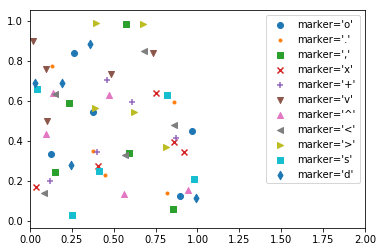

In [35]:
# 创建一个隔离的随机数生成器
rng = np.random.RandomState(123456)

# 循环绘制点图
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.scatter(list(rng.rand(5)), list(rng.rand(5)), marker = marker,
               label="marker='{0}'".format(marker))

# 显示图例
plt.legend(numpoints=1)
plt.xlim(0, 2)  # 避免图例与点重叠

如果数据点太多，点和点会重叠到一起，这样图形可能会不美观并且会阻碍读者对于数据量的判断。比较好的解决办法是为点设置一定的透明度。

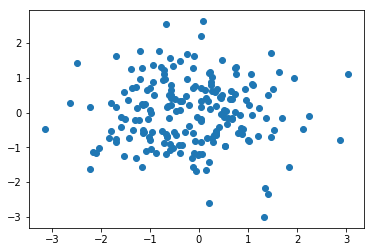

In [36]:
rng = np.random.RandomState(12)
x = rng.randn(200)
y = rng.randn(200)

_ = plt.scatter(x, y)

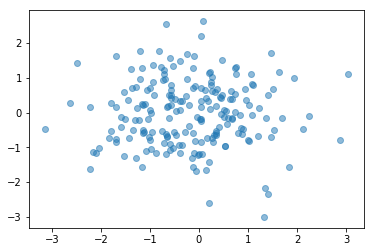

In [37]:
plt.scatter(x, y, alpha=0.5)  # 为数据点设置透明度

另外，点的大小和颜色常常用来表示有价值的信息，它们分别可以通过关键字参数s和c进行设置。

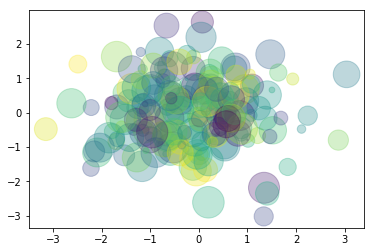

In [38]:
colors = rng.rand(200)
sizes = 1000 * rng.rand(200)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)

我们还可以将颜色条加上，以显示颜色代表的数值信息。

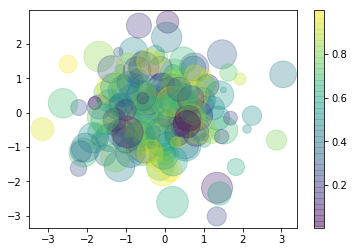

In [39]:
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.colorbar()

### 7.2.3 条形图

条形图也是一种常用的图形，常见于各种PPT的展示中，为各种职业人士所喜爱。对于各种场景下数值的比较，它非常简单直观。Matplotlib提供了bar()函数绘制条形图，本小节通过几个例子向读者介绍如何绘制垂直条形图、水平条形图、分组条形图以及堆叠条形图。

#### 垂直条形图

现在假设某销售公司需要在PPT中展示几位员工的年度销售业绩，条形图就是一个很好的选择。为简单起见，我们只绘制小红、小王、小李、小张四位员工的业绩，它们分别是400万、300万、250万以及375万。

下面我们会在图中标注一些中文信息，而Matplotlib本身对中文的支持并不是很优化，在绘图之前，请使用下面代码进行设置。

In [40]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 用来正常显示负号

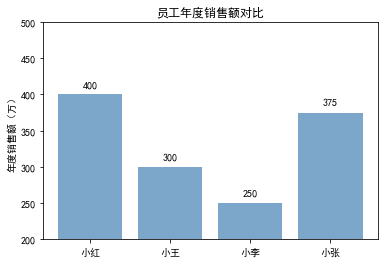

In [41]:
member = [u'小红', u'小王', u'小李', u'小张']
sales  = [400, 300, 250, 375]

# 绘图
plt.bar(range(4), sales, align = 'center',color='steelblue', alpha = 0.7)
# 添加y轴标签
plt.ylabel(u'年度销售额（万）')
# 添加标题
plt.title(u'员工年度销售额对比')
# 添加刻度标签
plt.xticks(range(4), member)
# 设置Y轴的刻度范围
plt.ylim([200,500])

# 在没有条形图上方添加数值标签
for x,y in enumerate(sales):
    plt.text(x,y+10,'%s' %round(y,1),ha='center')

创建条形图与创建点图或线图没什么差别，我们都是给函数提供x轴与y轴数据，不过不同的图形有着不同的数据展示方式和自定义选项。这里bar()函数设置x轴刻度标签为水平居中，条形图的填充色为铁蓝色，同时设置透明度为0.7。

另外，我们添加了y轴标签、标题、x轴刻度标签值，使得图形更富有信息。为了突显条形图各柱体之间的差异，这里将y轴范围设置在200到500。

最后，我们通过循环的方式，在条形的上方添加的数值标签，指定具体的数值，更加方便查看。

#### 水平条形图

如果想要将上面的垂直条形图改变为水平条形图，我们只需要将bar()函数调整为barh()函数，并将相应的标签进行调整即可。

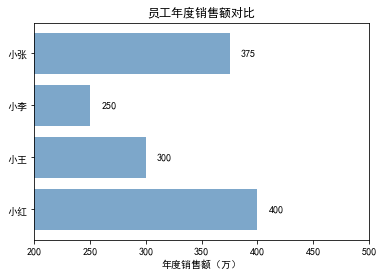

In [42]:
# 绘图
plt.barh(range(4), sales, align = 'center',color='steelblue', alpha = 0.7)
# 添加y轴标签
plt.xlabel(u'年度销售额（万）')
# 添加标题
plt.title(u'员工年度销售额对比')
# 添加刻度标签
plt.yticks(range(4), member)
# 设置X轴的刻度范围
plt.xlim([200,500])

# 在没有条形图右方添加数值标签
for x,y in enumerate(sales):
    plt.text(y+10,x,'%s' %y,va='center')

在添加条形图的数值标签时需要注意，在水平条形图中，x轴表示的是数值，y轴表示员工，所以text()函数前两个参数的顺序恰好与上一幅图的相反。

#### 分组条形图

很多时候需要展示的数据并不像上面一样简单。例如，我们拓展一下问题的复杂度：现在需要使用水平条形图展示每位员工前3个月的销售额。此时，我们需要将每位员工的销售额按月分组，然后分别绘制条形图进行展示，代码实现如下：

(-0.5, 4.5)

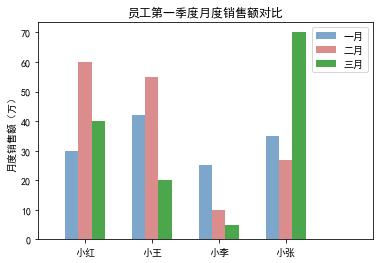

In [43]:
member = [u'小红', u'小王', u'小李', u'小张']
sales_jan  = [30, 42, 25, 35]  # 一月份的销售额
sales_feb  = [60, 55, 10, 27]  # 二月份的销售额
sales_mar  = [40, 20, 5, 70]   # 三月份的销售额

bar_width = 0.2  # 设置分组条形的宽度

# 绘图
plt.bar(range(4), sales_jan, label = u'一月', 
        color = 'steelblue', alpha = 0.7, width = bar_width)
# 也可以使用numpy模块的arange()函数构造横坐标
plt.bar(np.arange(4) + bar_width, sales_feb, label = u"二月",
        color = 'indianred', alpha = 0.7, width = bar_width)
plt.bar(np.arange(4) + bar_width*2, sales_mar, label = u"三月",
        color = 'green', alpha = 0.7, width = bar_width)

# 添加y轴标签
plt.ylabel('月度销售额（万）')
# 添加标题
plt.title('员工第一季度月度销售额对比')
# 添加刻度标签
plt.xticks(np.arange(4)+bar_width, member)
# 添加图例
plt.legend()
plt.xlim(-0.5, 4.5)

分组条形图比简单条形图更复杂之处在于，在摆放数据x轴坐标和刻度位置时需要进行额外的计算和调整。在执行坐标的计算时，推荐读者使用numpy，因为它支持广播机制，这让向量化的算术运算变得简单。例如，这个例子中，在设置第二个和第三个条形的x轴坐标时，我们使用了`np.arange(4) + bar_width`和`np.arange(4) + bar_width*2`，而通过Python列表实现将十分复杂。

#### 堆叠条形图

堆叠条形图是分组条形图展示的另一种形式，它把分类的数据堆叠在一起，显得更简约紧密，同时提供了求和信息。在实现上，绘制的思路与上一小节的条形图一样，不过前者是垂直偏移，后者是水平偏移。

下面使用同样的数据，我们将其展示为堆叠条形图。

(-0.5, 4.5)

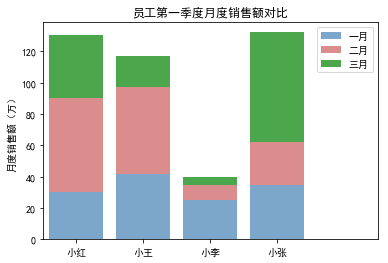

In [44]:
# 绘图
plt.bar(np.arange(4), sales_jan, label = u'一月', 
        color = 'steelblue', alpha = 0.7)
# 也可以使用numpy模块的arange()函数构造横坐标
plt.bar(np.arange(4), sales_feb, bottom = sales_jan, label = u"二月",
        color = 'indianred', alpha = 0.7)
plt.bar(np.arange(4), sales_mar, bottom = np.array(sales_jan) + np.array(sales_feb), label = u"三月",
        color = 'green', alpha = 0.7)

# 添加y轴标签
plt.ylabel('月度销售额（万）')
# 添加标题
plt.title('员工第一季度月度销售额对比')
# 添加刻度标签
plt.xticks(np.arange(4), member)
# 添加图例
plt.legend()
plt.xlim(-0.5, 4.5)

这里有2点非常关键：一是bottom选项的使用，它让数据在该基础之上进行一个偏移；二是NumPy模块array()函数的使用，它将列表类型的数据转换为ndarray以便于元素级别（向量化）运算。

本书关于条形图绘制的介绍到此结束，接下来的一小节将对与条形图“形似而神不似”的直方图进行介绍。

### 7.2.4 直方图

一个简单的直方图是读者了解数据很好的开始：它可以直观地展示了数据的分布，包括数值分布的区间，密度与形状。在实际的工作过程中，读者可能需要对数据进行数学建模和统计分析，这些数据处理技术往往基于数据符合某些假设，而直方图是检查数据最好的选择之一。

下面我们通过NumPy模块提供的随机数据生成函数产生符合正态分布的随机数据，并以它为样例绘制直方图。

(array([  3.,  19.,  55., 146., 244., 257., 173.,  72.,  27.,   4.]),
 array([-3.44159486, -2.77631499, -2.11103513, -1.44575526, -0.7804754 ,
        -0.11519553,  0.55008433,  1.2153642 ,  1.88064407,  2.54592393,
         3.2112038 ]),
 <a list of 10 Patch objects>)

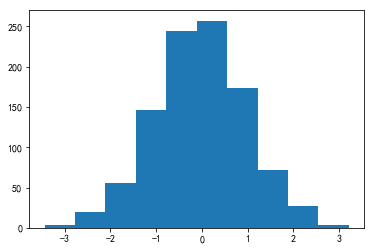

In [45]:
import numpy as np
import matplotlib.pyplot as plt

randn_data = np.random.randn(1000)

plt.hist(randn_data)

hist()函数也有非常多的选项用于调整图形。

```
plt.hist(x, bins=10, range=None, normed=False, 
        weights=None, cumulative=False, bottom=None, 
        histtype='bar', align='mid', orientation='vertical', 
        rwidth=None, log=False, color=None, 
        label=None, stacked=False)
```

- x - 指定要绘制直方图的数据
- bins - 指定直方图条形的个数
- range - 指定直方图数据的上下边界，默认包含绘图数据的最大值和最小值
- density - 是否将直方图的频数转换成频率
- weights - 为每一个数据点设置权重
- cumulative - 是否需要计算累计频数或频率
- bottom - 可以为直方图的每个条形添加基准线，默认为0
- histtype - 指定直方图的类型，默认为bar，除此还有’barstacked’、‘step’、‘stepfilled’
- align - 设置条形边界值的对其方式，默认为mid，除此还有’left’和’right’
- orientation - 设置直方图的摆放方向，默认为垂直方向
- rwidth - 设置直方图条形宽度的百分比
- log - 是否需要对绘图数据进行log变换
- color - 设置直方图的填充色
- label - 设置直方图的标签，可通过legend展示其图例
- stacked - 当有多个数据时，是否需要将直方图呈堆叠摆放，默认水平摆放

现在我们更改几个最常用的选项。

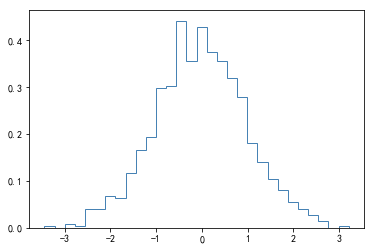

In [46]:
_ = plt.hist(randn_data, bins=30, density=True,
         histtype='step', color='steelblue')

如果要比较多个数据的分布，使用选项`histtype='stepfilled'`和设置一定的透明度会很好用。

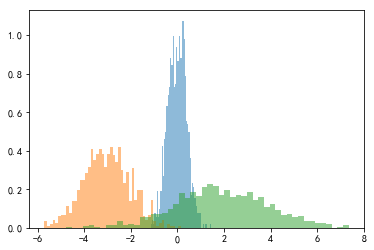

In [47]:
x1 = np.random.normal(0, 0.4, 1000)
x2 = np.random.normal(-3, 1, 1000)
x3 = np.random.normal(2, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.5, density=True, bins=50)

_ = plt.hist(x1, **kwargs)
_ = plt.hist(x2, **kwargs)
_ = plt.hist(x3, **kwargs)

有时候，我们不仅仅想通过直方图直观地看到，而且想获取不同条形个数下区间内的频数/频率。NumPy提供的histogram()函数可以满足这个需求。

下面我们从randn_data中提取设置10个条形时的各自的频数。

In [48]:
counts, bin_edges = np.histogram(randn_data, bins=10)
print(counts)

[  3  19  55 146 244 257 173  72  27   4]


设置`density=True`可以获取相应的频率。

In [49]:
density, bin_edges = np.histogram(randn_data, bins=10, density=True)
print(density)

[0.00450938 0.02855941 0.08267197 0.21945651 0.36676294 0.38630359
 0.26004094 0.10822513 0.04058442 0.00601251]


如果使用的是二维数据，Matplotlib同样提供了函数hist2d()来查看数据的分布。相比于一维数据中直方图将数据切分到不同的区间中去，二维直方图在两个维度进行切分，因此会得到一个一个的小方格。

同样地，我们使用随机数据生成函数生成二维的随机数据用于绘图演示。

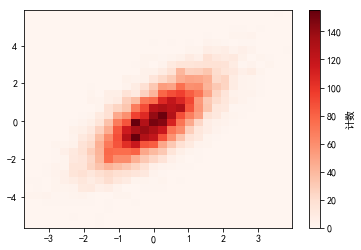

In [50]:
# 创建二维随机数据
mean = [0, 0]  # 均值
cov = [[1, 1], [1, 2]]  # 协方差矩阵
x, y = np.random.multivariate_normal(mean, cov, 10000).T  

# 绘制图形
plt.hist2d(x, y, bins=30, cmap='Reds')
cb = plt.colorbar()
cb.set_label(u'计数')

### 7.2.5 饼图

饼图也是常见且为人喜爱的一种图形，它可以表示离散变量各水平的占比情况。Matplotlib提供了pie()函数用于饼图的绘制，下面我们看一个简单的例子：

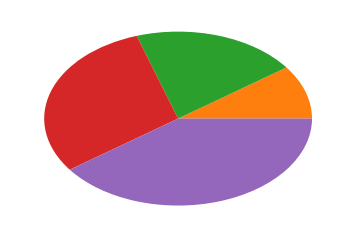

In [51]:
import matplotlib.pyplot as plt
_ = plt.pie(range(5))

接着我们看一下pie()提供的一些详细选项：

```
plt.pie(x, explode=None, labels=None, colors=None, 
        autopct=None, pctdistance=0.6, shadow=False, 
        labeldistance=1.1, startangle=None, 
        radius=None, counterclock=True, wedgeprops=None, 
        textprops=None, center=(0, 0), frame=False)
```

- x - 绘图的数据
- explode - 指定饼图某些部分的突出显示
- labels - 添加标签
- colors - 指定填充色
- autopct - 自动添加百分比显示，可以采用格式化的方法显示
- pctdistance - 设置百分比标签与圆心的距离
- shadow - 是否添加阴影效果
- labeldistance - 设置各扇形标签与圆心的距离
- startangle - 设置饼图的初始摆放角度
- radius - 设置饼图的半径大小
- counterclock - 是否让饼图按逆时针顺序呈现
- wedgeprops - 设置饼图内外边界的属性，如边界线的粗细、颜色等
- textprops - 设置饼图中文本的属性，如字体大小、颜色等
- center - 指定饼图的中心点位置，默认为原点
- frame - 是否要显示饼图背后的图框，如果设置为True的话，需要同时控制图框x轴、y轴的范围和饼图的中心位置

使用这些选项，我们可以实现丰富的饼图呈现效果。假设某劳务公司现在统计了职工的学历占比情况，现在想要使用饼图展现出来，并突出硕士学位的群体。我们通过这个需求的实现学习一些常用选项的用法。

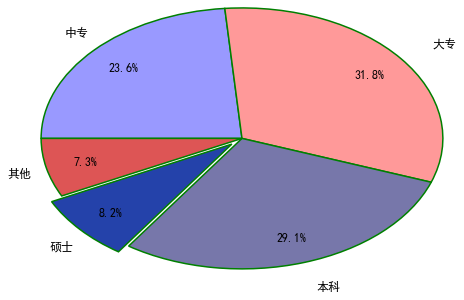

In [52]:
# 构造数据
edu = [0.26,0.35,0.32,0.09,0.08]
labels = [u'中专',u'大专',u'本科',u'硕士',u'其他']

explode = [0,0,0,0.1,0]  # 突出硕士群体
colors=['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555'] # 自定义颜色

# 绘制饼图
_ = plt.pie(x = edu, 
        explode=explode,
        labels=labels,         # 添加教育水平标签
        colors=colors,         # 设置饼图的自定义填充色
        autopct='%.1f%%',      # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,       # 设置百分比标签与圆心的距离
        labeldistance = 1.2,   # 设置教育水平标签与圆心的距离
        startangle = 180,      # 设置饼图的初始角度
        radius = 1.5,          # 设置饼图的半径
        counterclock = False,  # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},  # 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'k'},  # 设置文本标签的属性值
        center = (2,2),  # 设置饼图的原点
        frame = 0 )  # 是否显示饼图的图框，这里设置显示

### 7.2.6 箱线图

箱线图是本节介绍的最后一种图形。箱线图一般用来展现数据的分布，如上下四分位值、中位数等。同时，箱线图可以直观地展示异常点。

Matplotlib提供了boxplot()函数绘制箱线图，下面看一个简单的例子。

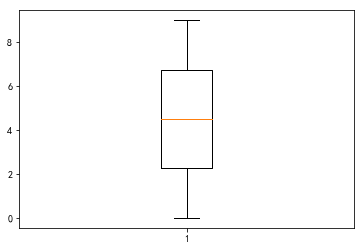

In [53]:
import matplotlib.pyplot as plt

_ = plt.boxplot(range(10))  # 10个数，0-9

箱线图虽然看起来简单，但包含的数据信息非常丰富。橙色的线条表示中位数，中间条形的上下边界分别对应上四分位数（75%的数据都小于该值）与下四位分数（25%的数据小于该值），从条形延伸出两条线段，两条线段的终点表示数据的最大值和最小值。

In [54]:
print(np.median(np.arange(10)))  # 中位数

print(np.quantile(np.arange(10), 0.25))  # 下4分位数，也叫第1分位数
print(np.quantile(np.arange(10), 0.75))  # 上4分位数，也叫第3分位数

4.5
2.25
6.75


boxplot()函数同样提供了丰富的自定义选项。

```
 plt.boxplot(x, notch=None, sym=None, vert=None, 
             whis=None, positions=None, widths=None, 
             patch_artist=None, meanline=None, showmeans=None, 
             showcaps=None, showbox=None, showfliers=None, 
             boxprops=None, labels=None, flierprops=None, 
             medianprops=None, meanprops=None, 
             capprops=None, whiskerprops=None)
```

- x - 绘图数据
- notch - 是否是凹口的形式展现箱线图，默认非凹口
- sym - 指定异常点的形状，默认为+号显示
- vert - 是否需要将箱线图垂直摆放，默认垂直摆放
- whis - 指定上下须与上下四分位的距离，默认为1.5倍的四分位差
- positions - 指定箱线图位置，默认为[0,1,2…]
- widths - 指定箱线图宽度，默认为0.5
- patch_artist - 是否填充箱体的颜色
- meanline - 是否用线的形式表示均值，默认用点来表示
- showmeans - 是否显示均值，默认不显示 
- showcaps - 是否显示箱线图顶端和末端的两条线，默认显示
- showbox - 是否显示箱线图的箱体，默认显示
- showfliers - 是否显示异常值，默认显示
- boxprops - 设置箱体的属性，如边框色，填充色等
- labels - 为箱线图添加标签，类似于图例的作用
- filerprops - 设置异常值的属性，如异常点的形状、大小、填充色等
- medianprops - 设置中位数的属性，如线的类型、粗细等
- meanprops - 设置均值的属性，如点的大小、颜色等
- capprops - 设置箱线图顶端和末端线条的属性，如颜色、粗细等
- whiskerprops - 设置须的属性，如颜色、粗细、线的类型等

箱线图通常在进行多组数据比较时使用。下面代码展示了3组简单数据的箱线图，添加凹口、均值点、颜色以及每组的标签。设定这几个选项已经适用于绝大多数情况。

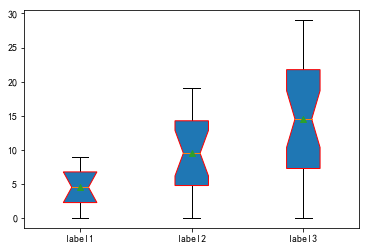

In [55]:
_ = plt.boxplot([range(10), range(20), range(30)], 
                patch_artist=True,
                boxprops={'color':'red'}, 
                notch=True, showmeans=True, 
                labels=["label1", "label2", "label3"])

## 多图与自定义

上一节聚焦于各种常见图形绘制方法的介绍，本节在其基础上介绍如何组织多个图形、介绍自定义图形更多的操作方法。

### 多图

数据可视化的结果往往不是一个图形可以展示的，表明某个主题或观点的图形常被放置在一起组成多图。Matplotlib提供了多种方式可以在一个图形中绘制多个子图。

#### 网格子图

Matplotlib的subplot()函数提供了一种简单的方式在网格中绘制子图。下面的代码创建了4个子图，分割为2行2列。子图的索引从1开始，从左上到右下依次增加，该信息也标注在了每个子图的中心。

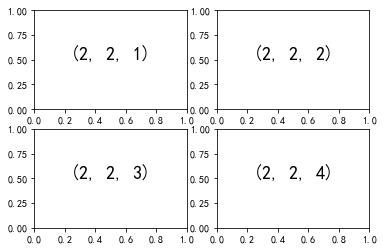

In [56]:
import matplotlib.pyplot as plt

for i in range(1, 5):
    plt.subplot(2, 2, i)  # 2行2列，子图索引i
    plt.text(0.5, 0.5, str((2, 2, i)),
             fontsize=18, ha='center')

上面子图间的空隙比较小，读者可以通过subplots_adjust()对间隔进行调整。

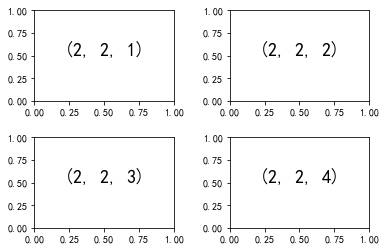

In [57]:
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # 调整子图之间的高与宽间隔

for i in range(1, 5):
    plt.subplot(2, 2, i)  # 2行2列，子图索引i
    plt.text(0.5, 0.5, str((2, 2, i)),
             fontsize=18, ha='center')

这样图形看起来就舒服很多了。

#### 手动绘制子图

简单的多图排列使用subplot()函数就可以很好地解决，但有时候我们想要将子图绘制在特定的位置，这时subplot()函数就不能满足了。

Matplotlib提供了axes()函数生成一个标准的坐标轴对象，该函数可以传入一个4元素的列表`[left, bottom, width, height]`指定图形在坐标系统中的位置。坐标系统左下角到右上角从0到1变化。

下面代码在图形的左上方添加了一个子图。

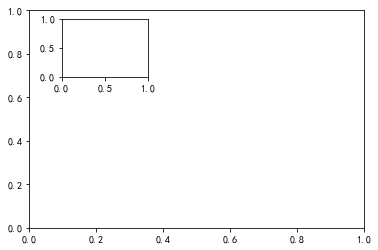

In [58]:
ax1 = plt.axes()  # 标准坐标轴
# 子图距离左侧0.2，下方0.65，宽度0.2，高度0.2
ax2 = plt.axes([0.2, 0.65, 0.2, 0.2])

需要注意的是，列表中值与其看作小数，我们把它们看作百分数更为合适。我们可以把标准坐标轴看作长宽都是100%，子图距离左侧20%的长度，距离下方65%的长度，宽度占标准坐标轴宽度20%，高度占标准坐标轴高度20%。

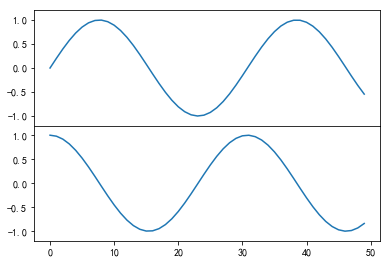

In [59]:
x = np.linspace(0, 10)  # 创建x轴数据 

fig = plt.figure()      # 创建图形对象

ax1 = plt.axes([0.1, 0.5, 0.8, 0.4],
        xticklabels=[], ylim=(-1.2, 1.2))
plt.plot(np.sin(x))     # 绘制子图1

ax2 = plt.axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))
plt.plot(np.cos(x))     # 绘制子图2

上面代码首先创建了一个空白的图形对象，然后在上面绘制了2个子图：第1个子图绘制在图形的上方，去掉了横轴的刻度标签；第2个子图绘制在图形的下方。我们需要注意这里手动绘制多图的要点在于根据需求计算放置坐标轴的位置，上面2个坐标轴除了距离图形底部的位置不一样，其他坐标设定完全一致。并且，每个子图坐标轴的高度是0.4，所以第1个子图距离底部的位置要设定为0.5，这样上面子图的坐标轴底部边界线与下面子图的坐标轴顶部边界线才完全匹配（图中间的线条）。

### 设置风格

图形整体的样式（也称风格或主题）也可以多种多样，这无法通过我们前面学习过的操作实现，Matplotlib库提供的style.use()函数可以为创建的图形设置合适的美学风格。

例如，下面代码可以确保生成的图形使用经典的Matplotlib风格：

In [60]:
plt.style.use('classic')

我们绘制简单的图形看一看显示效果。

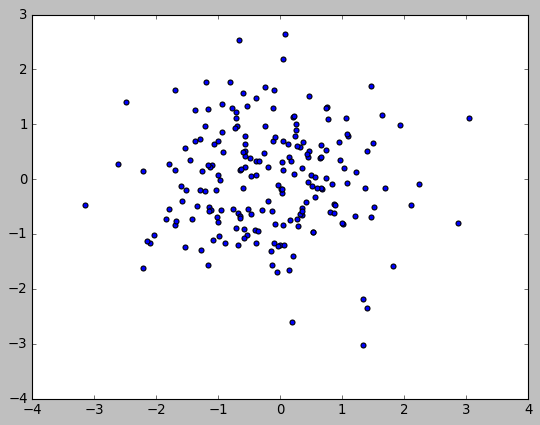

In [61]:
rng = np.random.RandomState(12)
x = rng.randn(200)
y = rng.randn(200)

_ = plt.scatter(x, y)

下面代码可以更换为seaborn库white风格。

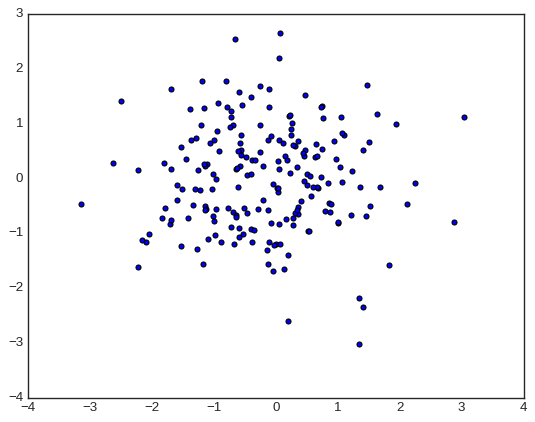

In [62]:
plt.style.use('seaborn-white')

_ = plt.scatter(x, y)

下面代码可以更换为流行R包ggplot风格。

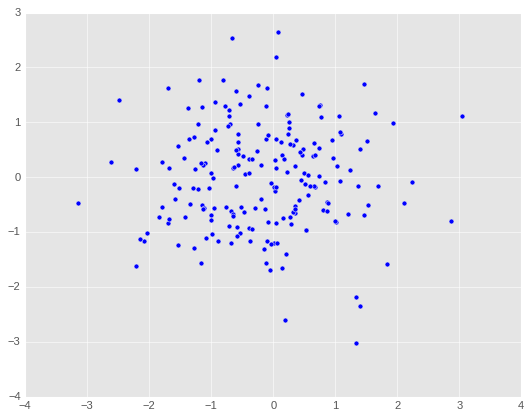

In [63]:
plt.style.use('ggplot')

_ = plt.scatter(x, y)

下面代码列出所有支持的风格。

In [64]:
print(plt.style.available)

['seaborn-dark', 'seaborn-ticks', 'classic', 'seaborn-white', 'fast', 'seaborn-whitegrid', 'tableau-colorblind10', 'seaborn', 'seaborn-deep', 'Solarize_Light2', 'seaborn-colorblind', 'seaborn-darkgrid', 'dark_background', 'seaborn-bright', 'ggplot', 'seaborn-talk', 'seaborn-notebook', 'grayscale', 'fivethirtyeight', 'bmh', 'seaborn-dark-palette', 'seaborn-pastel', '_classic_test', 'seaborn-poster', 'seaborn-muted', 'seaborn-paper']


所有支持的风格示例可以通过<https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html>查看。

### 两种接口映射

在本章的大部分内容的介绍中，我们只使用了Matplotlib的一种接口，即Matlab样式接口。这样做的目的是为了提高读者学习的连贯性，方便理解。对于每一种Matlab样式接口操作，基本都有相应的面向对象操作与之对应。在学习和熟练一种接口的基础上理解另一种就更加顺手了。

下面列出两种接口常见的操作函数映射：

```
plt.plot()  -> ax.plot()
plt.legend() -> ax.legend()
plt.xlabel() -> ax.set_xlabel()
plt.ylabel() -> ax.set_ylabel()
plt.xlim()   -> ax.set_xlim()
plt.ylim()   -> ax.set_ylim()
plt.title()  -> ax.set_title()
```

面向对象的方式读者可以使用set()方法一次性对所有样式进行设定。下面画一个简单的正弦图说明：

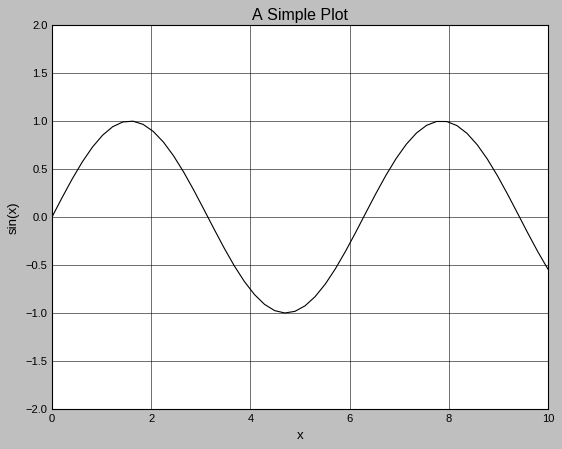

In [65]:
plt.style.use('grayscale')
x = np.linspace(0, 10) 

ax = plt.axes()
ax.plot(x, np.sin(x))
_ = ax.set(xlim=(0,10), ylim=(-2,2),
      xlabel='x', ylabel='sin(x)',
      title='A Simple Plot')

## 7.4 章末小结

本章首先简单介绍了Matplotlib库的历史，然后介绍了脚本、IPython Shell和Jupyter Notebook 3种不同应用场景下Matplotlib的操作方式，紧接着介绍了如何2种不同的接口：一种是Matlab样式的，命令式的操作，绘制简单和基础的图形非常方便；另一种基于面向对象，除了可以实现基本的绘图，多用于复杂的图形构造。在读者对于Matplotlib有了整体轮廓的基础上，本章随后向读者介绍常见基础图形的绘制方法，包括：点图、线图、条形图、直方图、饼图以及箱线图。最后的内容则聚焦于多图的实现和图形风格的设定。